In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = '/content/INFY.NS.csv'
data = pd.read_csv(file_path)

print("Dataset Overview:")
print(data.head())

print("\nMissing Values in Dataset:")
print(data.isnull().sum())

print("\nDataset Info:")
print(data.info())

Dataset Overview:
         Date   Open        High         Low       Close   Adj Close  \
0  2015-07-01  494.5  502.500000  493.000000  498.700012  415.561249   
1  2015-07-02  499.5  500.700012  492.524994  494.000000  411.644745   
2  2015-07-03  494.0  496.500000  491.000000  495.149994  412.603058   
3  2015-07-06  492.5  494.000000  487.500000  491.649994  409.686493   
4  2015-07-07  492.5  495.000000  489.500000  490.250000  408.519897   

      Volume  
0  6880852.0  
1  4007568.0  
2  2695306.0  
3  4305602.0  
4  3497418.0  

Missing Values in Dataset:
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   

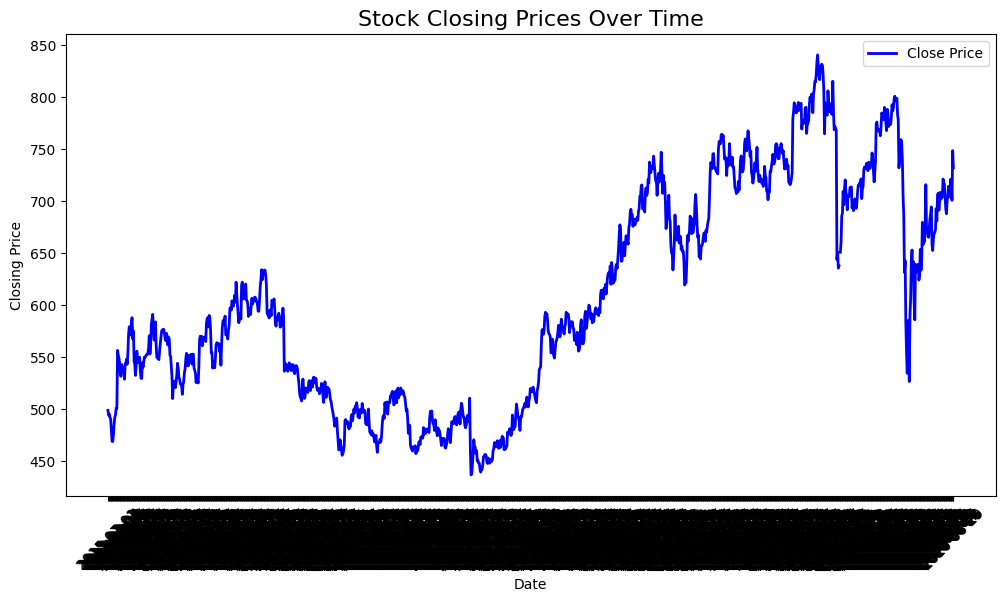

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=2)
plt.title("Stock Closing Prices Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# plt.figure(figsize=(10, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title("Correlation Heatmap", fontsize=16)
# plt.show()

In [5]:
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-5-78472de9229c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [6]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict using Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")


Linear Regression Performance:
Mean Squared Error: 17.67
R2 Score: 1.00


In [7]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest Performance:
Mean Squared Error: 24.10
R2 Score: 1.00


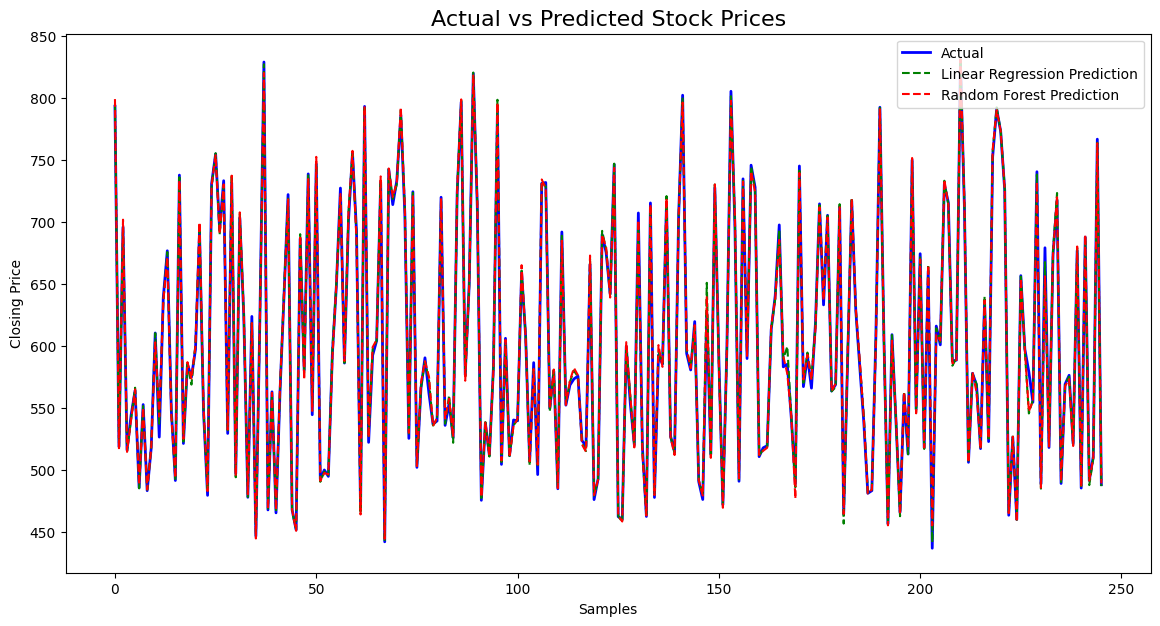

In [8]:
# Plot actual vs predicted for both models
plt.figure(figsize=(14, 7))

plt.plot(y_test.values, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_lr, label='Linear Regression Prediction', color='green', linestyle='--')
plt.plot(y_pred_rf, label='Random Forest Prediction', color='red', linestyle='--')

plt.title("Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Samples")
plt.ylabel("Closing Price")
plt.legend()
plt.show()
